# **Tomato Leaf Disease Classification Using VGG16**

Over 20k images of tomato leaves with 10 diseases and 1 healthy class. Images are collected from both lab scenes and in-the-wild scenes. The goal is to develop a lightweight model that can predict tomato leaf disease & deploy it offline on a mobile app.

Classes:

*   Late_blight
*   healthy
*   Early_blight
*   Septorialeafspot
*   TomatoYellowLeafCurlVirus
*   Bacterial_spot
*   Target_Spot
*   Tomatomosaicvirus
*   Leaf_Mold
*   Spidermites Two-spottedspider_mite
*   Powdery Mildew

The original source of most of the images is the PlantVillage dataset published here and here. The data has been augmented offline using multiple advanced techniques like image flipping, Gamma correction, noise injection, PCA color augmentation, rotation, and scaling. Some recent images were generated offline with GANs. The subset of images containing Taiwan tomato leaves was augmented using rotations at multiple angles, mirroring, reducing image brightness, etc.


**Dataset** : Tomato Disease Multiple Sources

**Sumber**: Kaggle Dataset [**Tomato Disease Multiple Sources**](https://www.kaggle.com/datasets/cookiefinder/tomato-disease-multiple-sources?select=train)

## Importing Library

In [1]:
#Directory

import os, zipfile, shutil

#Preprocessing, Dense, Layer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import sklearn.metrics as metrics
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.callbacks import ModelCheckpoint

#plotting Model Acc and Loss
import matplotlib.pyplot as plt


## Importing Dataset

In [2]:
#install kaggle package
!pip install -q kaggle

In [3]:
#upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityayogaadhiputra","key":"8096d30c70947bf584550096a0958ecb"}'}

In [4]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [5]:
!kaggle datasets download -d cookiefinder/tomato-disease-multiple-sources

 99% 1.36G/1.37G [00:05<00:00, 253MB/s]
100% 1.37G/1.37G [00:05<00:00, 270MB/s]


In [6]:
!unzip /content/tomato-disease-multiple-sources.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/Late_blight/9afc2537-1b13-4c25-b5ed-5b8de511b0ab___GHLB2 Leaf 9033.JPG  
  inflating: valid/Late_blight/9bb49d22-976d-40c3-bc9a-bff5cbbd8e28___RS_Late.B 5057.JPG  
  inflating: valid/Late_blight/9c274db5-2f89-4f3c-b9e2-4d5ebc54ddad___GHLB2 Leaf 9096.JPG  
  inflating: valid/Late_blight/9c726f4e-045b-4080-b53d-d7e66d45bcb1___RS_Late.B 4876.JPG  
  inflating: valid/Late_blight/9e5dd34f-124c-4a64-ba9f-77c8d05faa9c___GHLB2 Leaf 8749.JPG  
  inflating: valid/Late_blight/9e633823-3dde-450c-8172-733021e4dff0___RS_Late.B 6414.JPG  
  inflating: valid/Late_blight/9ecb8001-2f48-4487-b287-535dbcfb5c2f___RS_Late.B 6206.JPG  
  inflating: valid/Late_blight/9f7dcd60-e691-4c1e-830e-7495f7cc123d___RS_Late.B 6166.JPG  
  inflating: valid/Late_blight/Bacterial_spots2276_jpg.rf.5becd3793ec2a532bf8f111d60911c63.jpg  
  inflating: valid/Late_blight/IMG_1526_jpg.rf.5e25005985e2b12a6f52bfa7120f3eee.jpg  
  inflating: valid/Late_blight/IMG_

### **Data Visualization**

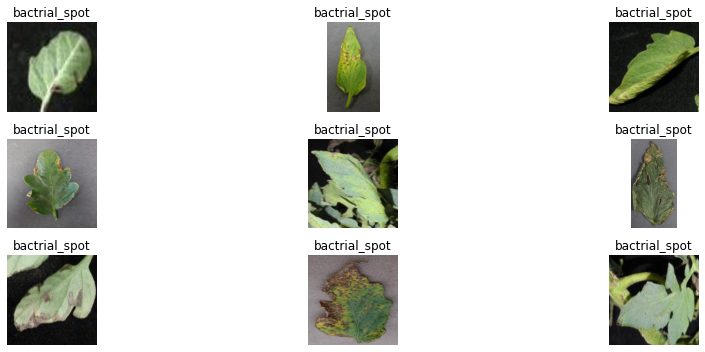

In [7]:
#bacterial spot
bacterial_spot = os.listdir("/content/train/Bacterial_spot")
bacterial_spot_dir = "/content/train/Bacterial_spot"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(bacterial_spot_dir, bacterial_spot[i]))
    plt.title("bactrial_spot")
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

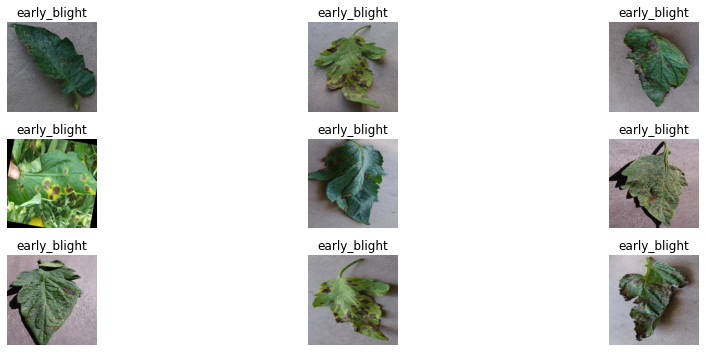

In [8]:
early_blight = os.listdir("/content/train/Early_blight")
early_blight_dir = "/content/train/Early_blight"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(early_blight_dir, early_blight[i]))
    plt.title("early_blight")
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

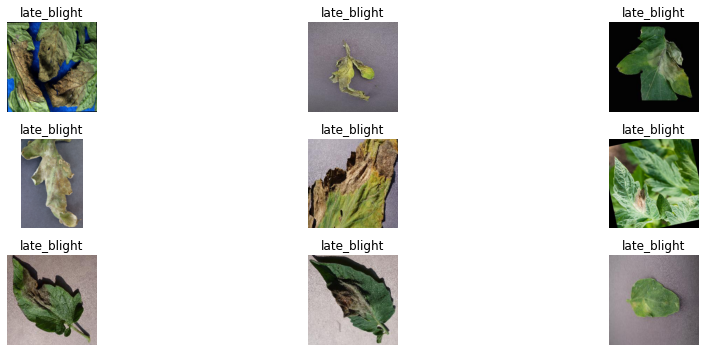

In [9]:
late_blight = os.listdir("/content/train/Late_blight")
late_blight_dir = "/content/train/Late_blight"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(late_blight_dir, late_blight[i]))
    plt.title("late_blight")
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

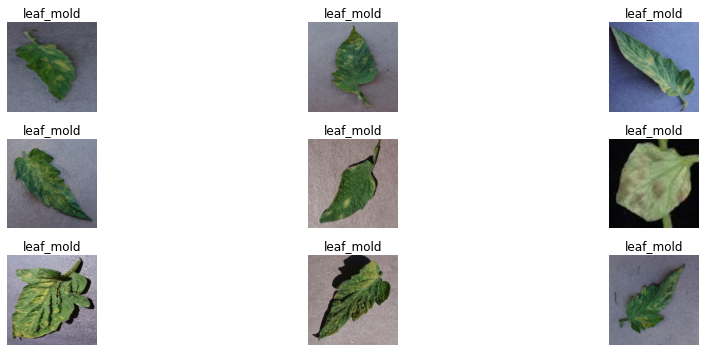

In [10]:
leaf_mold = os.listdir("/content/train/Leaf_Mold")
leaf_mold_dir = "/content/train/Leaf_Mold"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(leaf_mold_dir, leaf_mold[i]))
    plt.title("leaf_mold")
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

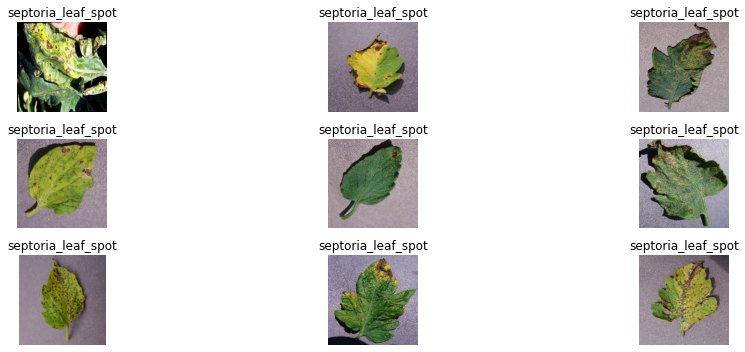

In [11]:
septoria_leaf_spot = os.listdir("/content/train/Septoria_leaf_spot")
septoria_leaf_spot_dir = "/content/train/Septoria_leaf_spot"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(septoria_leaf_spot_dir, septoria_leaf_spot[i]))
    plt.title("septoria_leaf_spot")
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

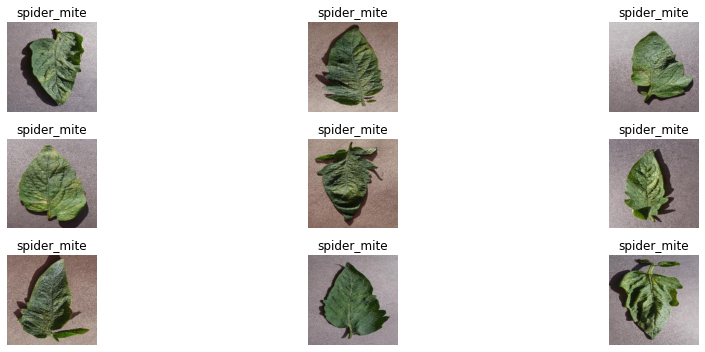

In [12]:
spider_mite = os.listdir("/content/train/Spider_mites Two-spotted_spider_mite")
spider_mite_dir = "/content/train/Spider_mites Two-spotted_spider_mite"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(spider_mite_dir, spider_mite[i]))
    plt.title("spider_mite")
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

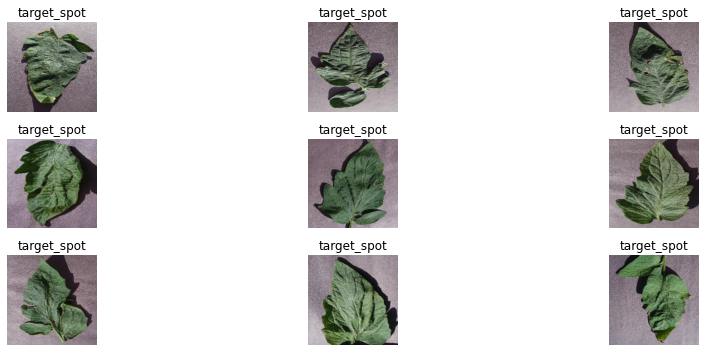

In [13]:
target_spot = os.listdir("/content/train/Target_Spot")
target_spot_dir = "/content/train/Target_Spot"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(target_spot_dir, target_spot[i]))
    plt.title("target_spot")
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

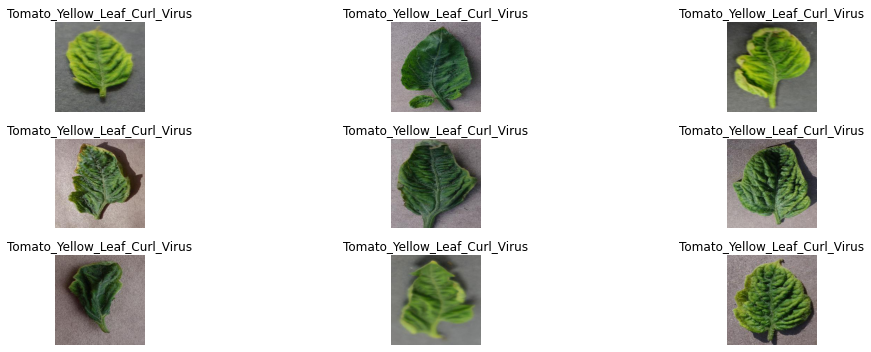

In [14]:
Tomato_Yellow_Leaf_Curl_Virus = os.listdir("/content/train/Tomato_Yellow_Leaf_Curl_Virus")
Tomato_Yellow_Leaf_Curl_Virus_dir = "/content/train/Tomato_Yellow_Leaf_Curl_Virus"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(Tomato_Yellow_Leaf_Curl_Virus_dir, Tomato_Yellow_Leaf_Curl_Virus[i]))
    plt.title("Tomato_Yellow_Leaf_Curl_Virus")
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

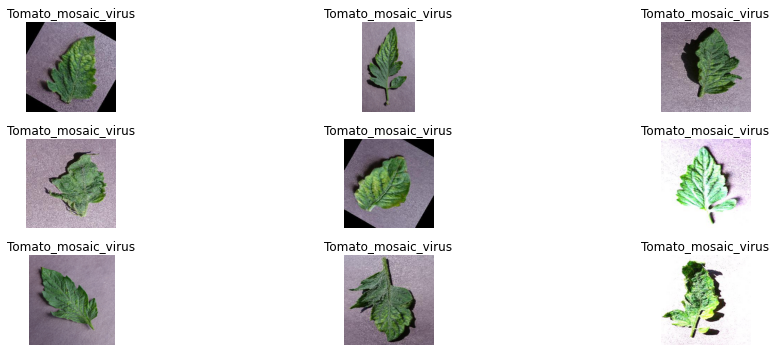

In [15]:
Tomato_mosaic_virus = os.listdir("/content/train/Tomato_mosaic_virus")
Tomato_mosaic_virus_dir = "/content/train/Tomato_mosaic_virus"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(Tomato_mosaic_virus_dir, Tomato_mosaic_virus[i]))
    plt.title("Tomato_mosaic_virus")
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

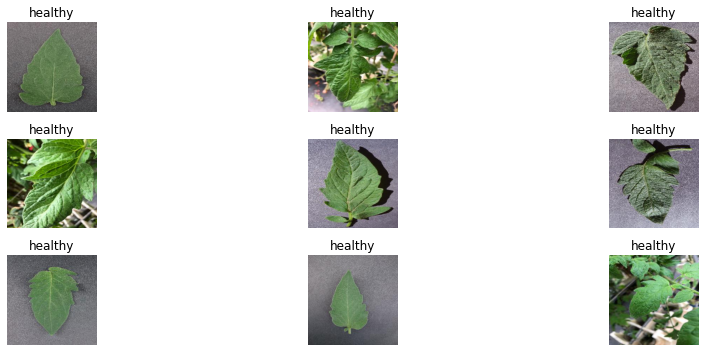

In [16]:
healthy = os.listdir("/content/train/healthy")
healthy_dir = "/content/train/healthy"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(healthy_dir, healthy[i]))
    plt.title("healthy")
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

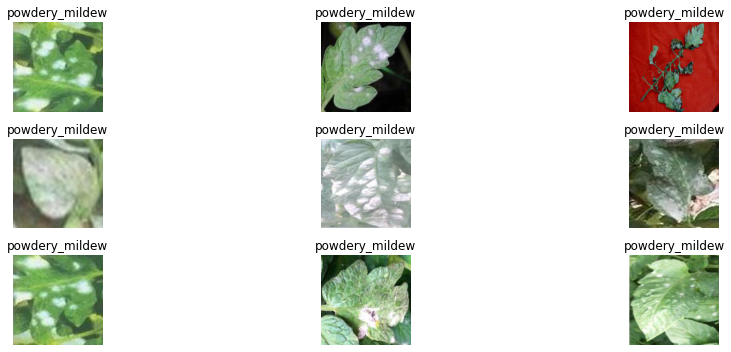

In [17]:
powdery_mildew = os.listdir("/content/train/powdery_mildew")
powdery_mildew_dir = "/content/train/powdery_mildew"

plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(powdery_mildew_dir, powdery_mildew[i]))
    plt.title("powdery_mildew")
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

**Image Data Generator**

Augmentasi Data

In [18]:
train_dir = "/content/train"
validation_dir = "/content/valid"

In [19]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.2,
    )

val_datagen = ImageDataGenerator(
    rescale=1./255)

In [20]:
train_generator = training_datagen.flow_from_directory(
    train_dir,
    class_mode='categorical',
    target_size=(224,224), 
    shuffle=True,
    batch_size=64)
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    class_mode='categorical',
    target_size=(224,224),
    batch_size=64)

Found 25851 images belonging to 11 classes.
Found 6684 images belonging to 11 classes.


**Initialization**

In [29]:
num_classes= 11
IMAGE_SHAPE = [224, 224]
epochs = 75

**Load and Compile the VGG Model**

In [30]:
vgg = VGG16(input_shape = (224,224,3),
            weights = 'imagenet',
            include_top = False)

for layer in vgg.layers:
 layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x)

from keras.optimizers import Adam
opt = Adam(lr=0.001)
model = Model(inputs = vgg.input, outputs = x)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


**Callback Function**

In [37]:
#Callback Function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91 and logs.get('val_accuracy')>0.9):
      print("\n Your accuracy model is quite enought ")
      self.model.stop_training = True
callbacks = myCallback()

**Visualize VGG19 Model**

In [32]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

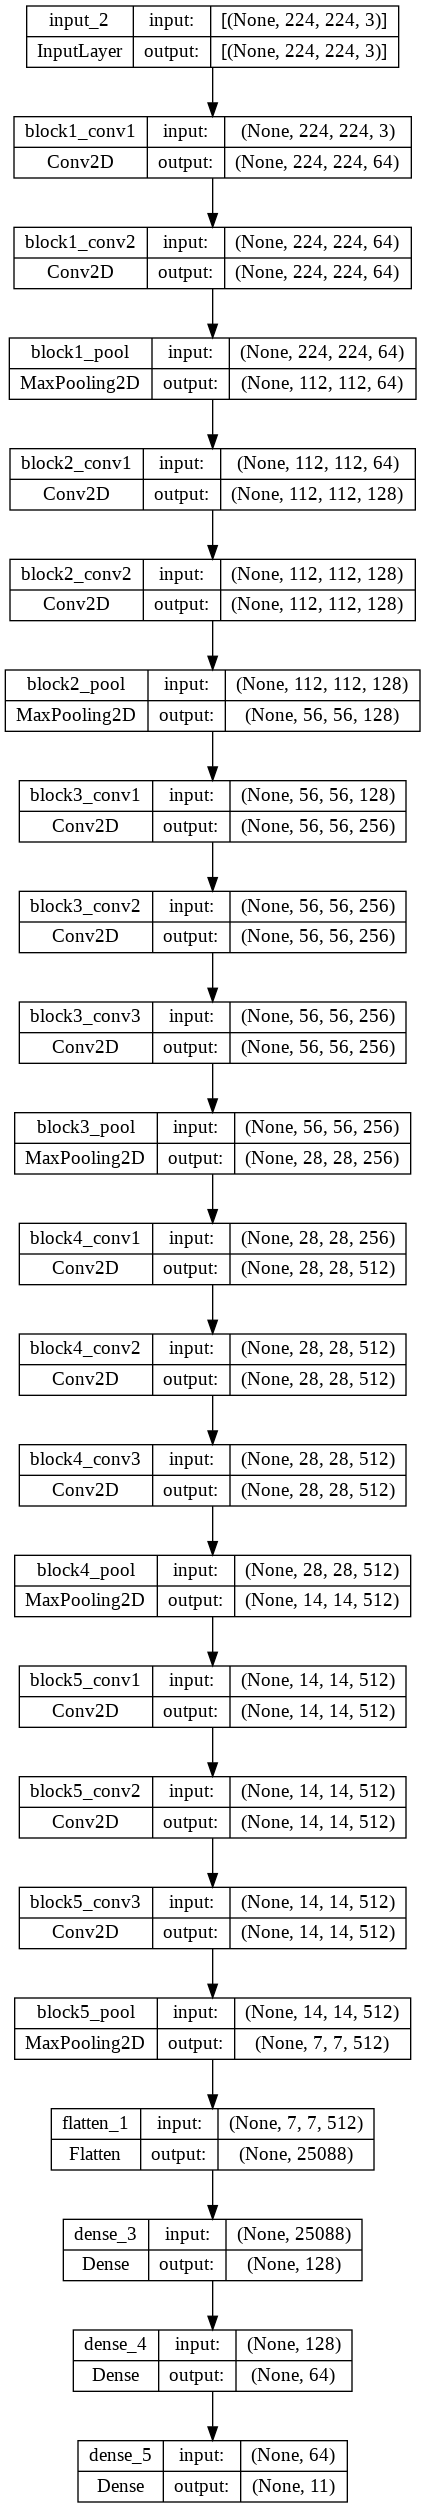

In [33]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


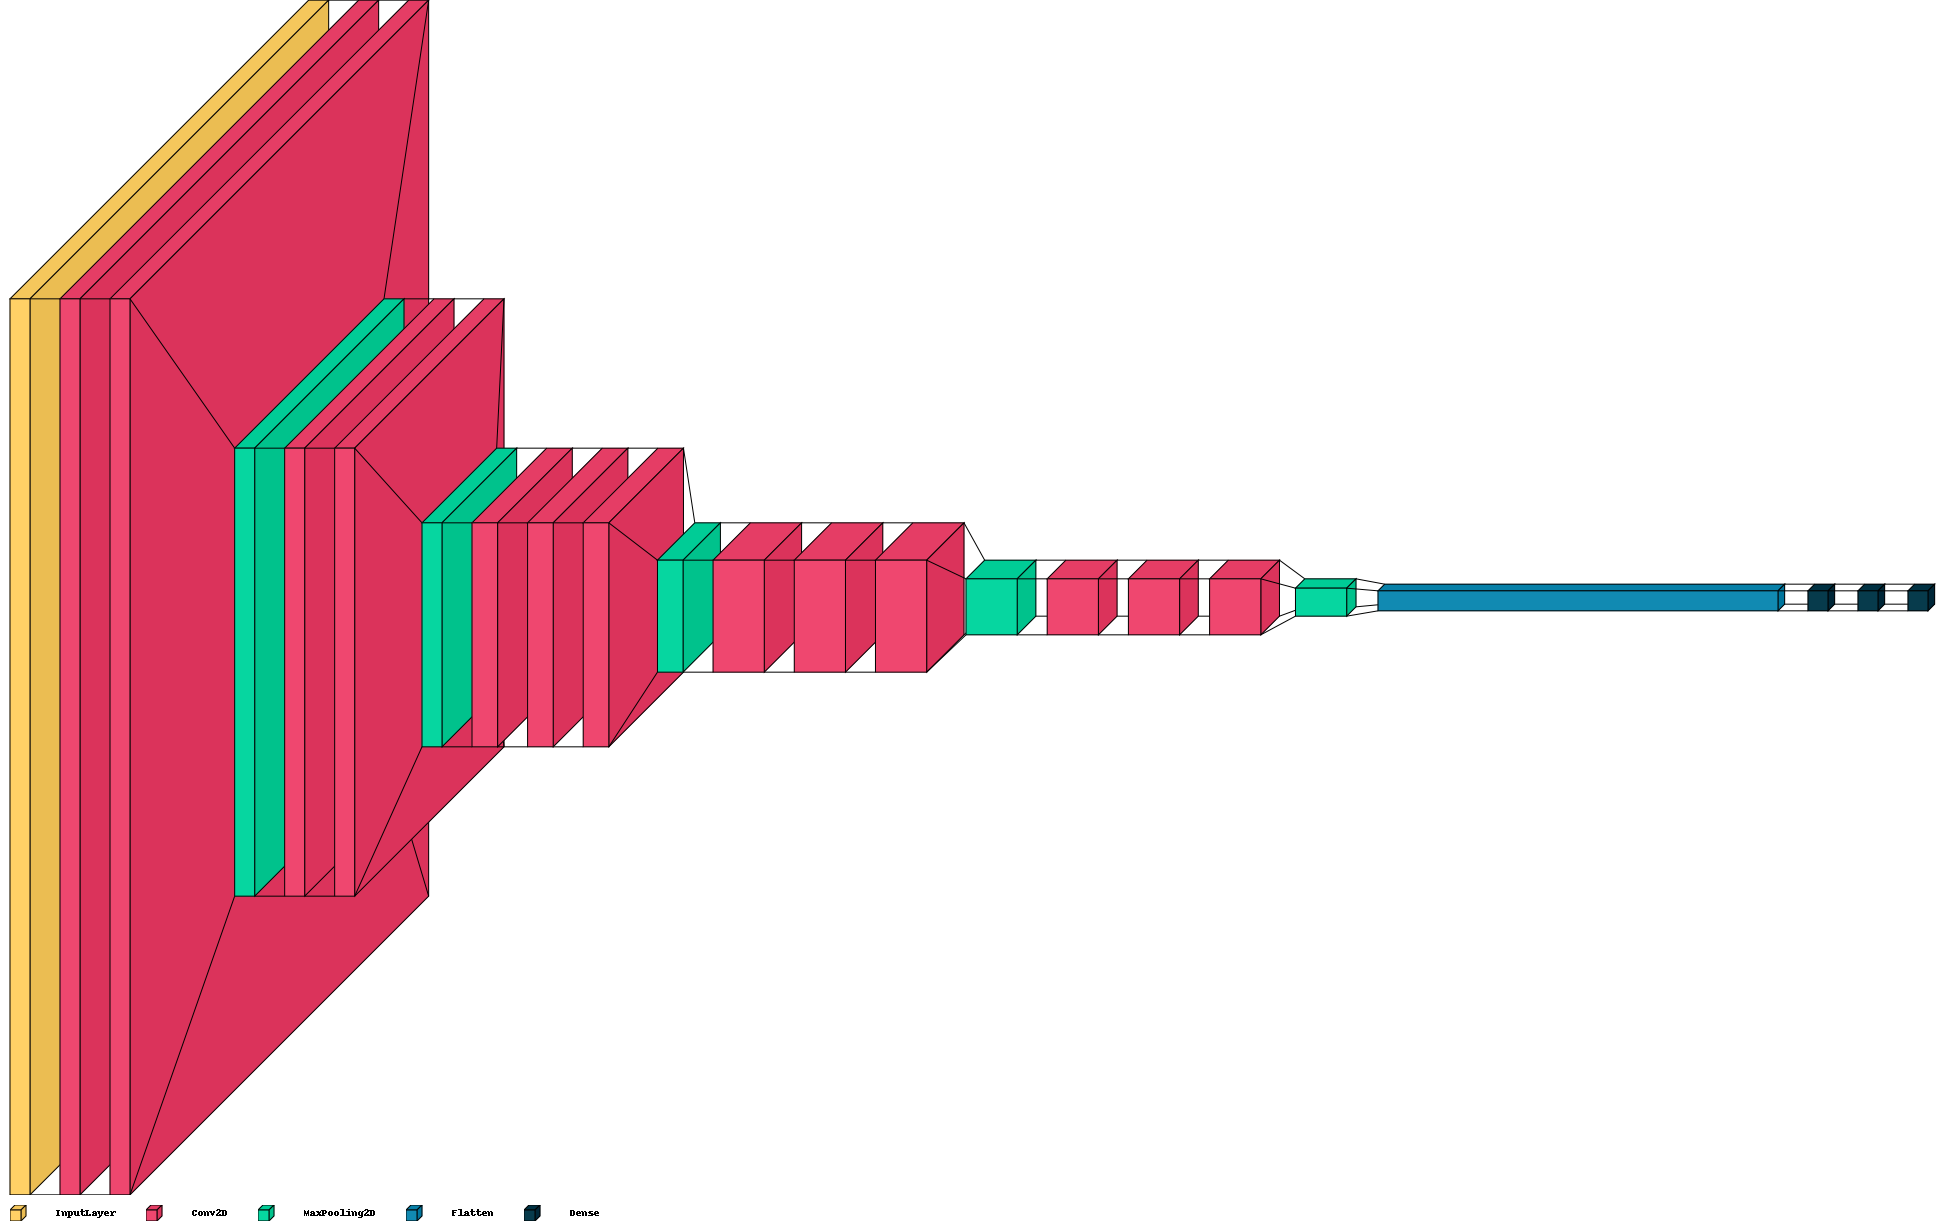

In [34]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend = True, spacing = 30)

In [38]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [39]:
hist = model.fit_generator(train_generator,
                    validation_data=validation_generator,
                    callbacks=[callbacks],
                    epochs=epochs, verbose=1)

print('Training Completed!')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/75
404/404 [==============================] - 369s 913ms/step - loss: 1.0582 - accuracy: 0.6522 - val_loss: 0.7896 - val_accuracy: 0.7228
Epoch 2/75
404/404 [==============================] - 358s 885ms/step - loss: 0.7189 - accuracy: 0.7576 - val_loss: 0.6741 - val_accuracy: 0.7696
Epoch 3/75
404/404 [==============================] - 358s 886ms/step - loss: 0.5796 - accuracy: 0.8034 - val_loss: 0.5854 - val_accuracy: 0.7952
Epoch 4/75
404/404 [==============================] - 359s 888ms/step - loss: 0.5139 - accuracy: 0.8220 - val_loss: 0.4910 - val_accuracy: 0.8323
Epoch 5/75
404/404 [==============================] - 359s 889ms/step - loss: 0.4597 - accuracy: 0.8425 - val_loss: 0.5276 - val_accuracy: 0.8194
Epoch 6/75
404/404 [==============================] - 356s 882ms/step - loss: 0.4165 - accuracy: 0.8573 - val_loss: 0.4552 - val_accuracy: 0.8481
Epoch 7/75
404/404 [==============================] - 357s 884ms/step - loss: 0.3907 - accuracy: 0.8656 - val_loss: 0.5134 -

**Plotting Accuracy and Loss**

**Accuracy**

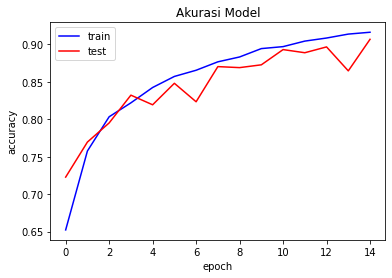

In [40]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], 'b')
plt.plot(hist.history['val_accuracy'], 'r')
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Loss**

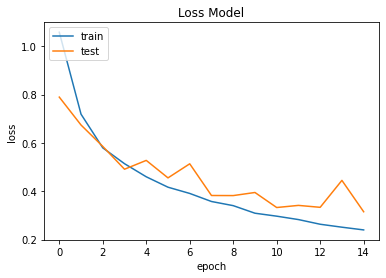

In [41]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Confusion Matrix**

In [42]:
batch_size = 64
y_pred = model.predict(validation_generator, (validation_generator.samples / batch_size))
val_preds = np.argmax(y_pred, axis=1)
import sklearn.metrics as metrics
val_trues =validation_generator.classes
from sklearn.metrics import classification_report
print(classification_report(val_trues, val_preds))

105/105 [==============================] - 34s 321ms/step
              precision    recall  f1-score   support

           0       0.11      0.10      0.10       732
           1       0.11      0.10      0.10       643
           2       0.12      0.12      0.12       792
           3       0.10      0.09      0.09       739
           4       0.12      0.13      0.13       746
           5       0.06      0.06      0.06       435
           6       0.05      0.05      0.05       457
           7       0.07      0.07      0.07       498
           8       0.07      0.06      0.06       584
           9       0.11      0.11      0.11       806
          10       0.05      0.06      0.06       252

    accuracy                           0.09      6684
   macro avg       0.09      0.09      0.09      6684
weighted avg       0.09      0.09      0.09      6684



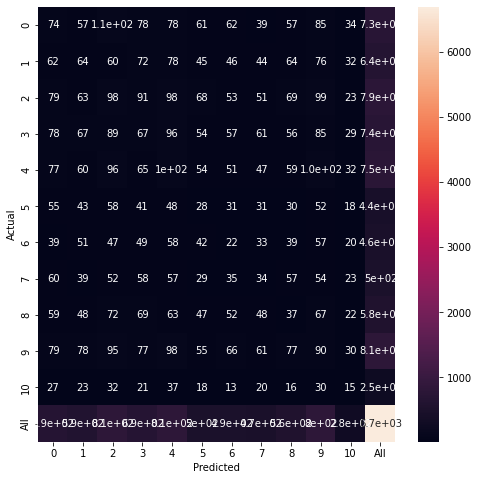

In [43]:
import seaborn as sns
data = {'y_Actual': val_trues,
        'y_Predicted': val_preds
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

**Save the Model**

In [44]:
keras_file="tomato_leaf_model_vgg19.h5"
tf.keras.models.save_model(model,keras_file)

In [45]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 588.3 MB 6.9 kB/s 
     |████████████████████████████████| 189 kB 74.6 MB/s 
     |████████████████████████████████| 16.2 MB 50.3 MB/s 
     |████████████████████████████████| 40 kB 7.3 MB/s 
     |████████████████████████████████| 8.3 MB 52.0 MB/s 
     |████████████████████████████████| 237 kB 77.7 MB/s 
     |████████████████████████████████| 154 kB 78.8 MB/s 
     |████████████████████████████████| 51 kB 8.1 MB/s 
     |████████████████████████████████| 439 kB 75.7 MB/s 
     |████████████████████████████████| 6.0 MB 49.2 MB/s 
     |████████████████████████████████| 1.7 MB 63.8 MB/s 
     |████████████████████████████████| 85 kB 5.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
   

In [46]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/tomato_leaf_model_vgg19.h5 \
    /tmp/tfjs_float_modell

2022-11-25 09:55:47.401172: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-25 09:55:47.402038: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-25 09:55:47.402062: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [49]:
!zip -r /content/tfjs_model.zip /tmp/tfjs_float_modell

  adding: tmp/tfjs_float_modell/ (stored 0%)
  adding: tmp/tfjs_float_modell/group1-shard5of18.bin (deflated 7%)
  adding: tmp/tfjs_float_modell/group1-shard7of18.bin (deflated 7%)
  adding: tmp/tfjs_float_modell/group1-shard10of18.bin (deflated 7%)
  adding: tmp/tfjs_float_modell/group1-shard3of18.bin (deflated 7%)
  adding: tmp/tfjs_float_modell/group1-shard18of18.bin (deflated 6%)
  adding: tmp/tfjs_float_modell/group1-shard12of18.bin (deflated 7%)
  adding: tmp/tfjs_float_modell/group1-shard13of18.bin (deflated 7%)
  adding: tmp/tfjs_float_modell/group1-shard2of18.bin (deflated 7%)
  adding: tmp/tfjs_float_modell/group1-shard14of18.bin (deflated 7%)
  adding: tmp/tfjs_float_modell/group1-shard8of18.bin (deflated 7%)
  adding: tmp/tfjs_float_modell/model.json (deflated 91%)
  adding: tmp/tfjs_float_modell/group1-shard17of18.bin (deflated 6%)
  adding: tmp/tfjs_float_modell/group1-shard9of18.bin (deflated 7%)
  adding: tmp/tfjs_float_modell/group1-shard11of18.bin (deflated 7%)
  addi

In [50]:
# Download the garbage detection model
files.download('/content/tfjs_model.zip')

print('`/content/tfjs_model.zip` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`/content/tfjs_model.zip` has been downloaded


**Prediction using new image**


1/1 [==============================] - 0s 145ms/step
Powdery_mildew


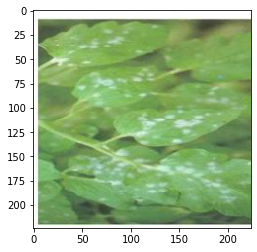

In [60]:
#create new file test.py and run this file
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
#load saved model
model = load_model("tomato_leaf_model_vgg19.h5") 
img_path = "/content/train/powdery_mildew/pm12_change_270.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ["Bacterial_Spot","Early_blight","Late_blight","Leaf_mold","Septoria_leaf_spot","Spider_mites Two_Spotted_spider_mite","Target_spot","Tomato_yellow_Leaf_Curl_Virus","Tomato_mosaic_virus","Healthy","Powdery_mildew"]
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
plt.imshow(img)
print(class_labels[pred[0]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


2/2 [==============================] - 3s 13ms/step


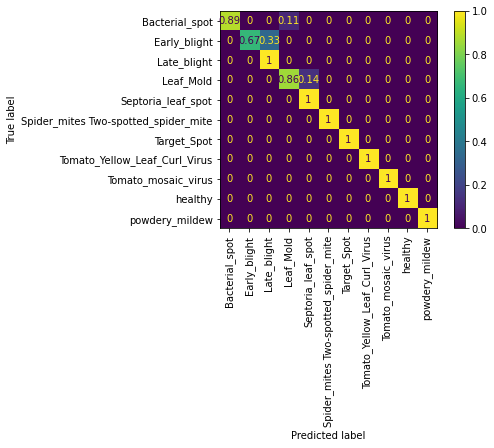

In [51]:
X,y = validation_generator.next()
y = np.argmax(y, axis=1)

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
class newmodel(MLPClassifier):
    def __init__(self, model):
        self.model = model
    def predict(self, X):
        y = self.model.predict(X)
        return np.argmax(y,axis=1)

model_cm = newmodel(model)
plot_confusion_matrix(model_cm, X, y , normalize='true', xticks_rotation = 'vertical', display_labels = list(train_generator.class_indices.keys()))